In [112]:
import pickle
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [126]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [33]:
habr_metadata = pd.read_csv('datasets/habr_metadata.csv', index_col=0, parse_dates= ['time'], converters={'title_lemma': ast.literal_eval, 'tags_lemma': ast.literal_eval, 'lemma_hub': ast.literal_eval})


# Работаем с данными

In [3]:
# создадим датафрейм 

data = pd.read_pickle('checkpoint1.pkl')

for i in range(2,6):
    a = pd.read_pickle('checkpoint'+str(i)+'.pkl')
    for k in a:
        data.append(k)



In [4]:
habr_metadata = pd.DataFrame(data)

In [34]:
habr_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 777
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   url          778 non-null    object             
 1   title        778 non-null    object             
 2   time         778 non-null    datetime64[ns, UTC]
 3   views        778 non-null    int64              
 4   tags         778 non-null    object             
 5   hub          778 non-null    object             
 6   bookmarks    778 non-null    int64              
 7   comments     778 non-null    int64              
 8   title_lemma  778 non-null    object             
 9   tags_lemma   778 non-null    object             
 10  lemma_hub    778 non-null    object             
 11  year         778 non-null    int64              
 12  month        778 non-null    int64              
 13  day          778 non-null    int64              
dtypes: datetime64[ns, UTC](1), int6

In [6]:
habr_metadata['views'].unique()

array(['68K', '47K', '35K', '93K', '13K', '30K', '26K', '4.6K', '12K',
       '56K', '479K', '52K', '63K', '6.1K', '22K', '9.6K', '17K', '4K',
       '11K', '16K', '8.5K', '5.4K', '33K', '8K', '6.4K', '23K', '21K',
       '24K', '122K', '18K', '71K', '7.5K', '1.8K', '27K', '5.7K', '94K',
       '6.8K', '7.4K', '10K', '20K', '4.2K', '14K', '5.1K', '46K', '6K',
       '7K', '7.9K', '2.6K', '45K', '175K', '19K', '8.2K', '9.3K', '2.2K',
       '70K', '5K', '4.9K', '88K', '239K', '43K', '1.9K', '240K', '2.1K',
       '36K', '15K', '32K', '3.9K', '2.3K', '3.2K', '388K', '61K', '5.6K',
       '28K', '6.9K', '332K', '50K', '57K', '8.7K', '9.7K', '25K', '2.5K',
       '7.3K', '7.7K', '7.2K', '333K', '3.7K', '5.3K', '7.8K', '2.9K',
       '3.1K', '76K', '8.3K', '130K', '9.9K', '9K', '2.8K', '9.5K', '34K',
       '4.1K', '6.3K', '8.9K', '3.4K', '1.6K', '7.6K', '108K', '104K',
       '1.5K', '131K', '4.5K', '39K', '1.1K', '3.8K', '6.5K', '8.4K',
       '29K', '265K', '38K', '2.7K', '3.3K', '5.5K',

In [7]:
# преобразование данных
habr_metadata['views']  = habr_metadata['views'].replace(r'[K]', '000', regex=True).replace(r'\D', '', regex = True)
habr_metadata['views'] = habr_metadata['views'].astype(int)
habr_metadata['time'] = pd.to_datetime(habr_metadata['time'])
habr_metadata[['bookmarks', 'comments']] = habr_metadata[['bookmarks', 'comments']] .apply(pd.to_numeric)

In [6]:
habr_metadata.describe()

,Unnamed: 0,views,bookmarks,comments,year,month,day
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,388.500000,40628.257069,55.601542,7.033419,2020.429306,6.678663,16.718509
std,224.733546,45414.264003,85.851706,11.582569,2.515489,3.332239,8.713172
min,0.000000,357.000000,0.000000,0.000000,2012.000000,1.000000,1.000000
25%,194.250000,15000.000000,16.000000,0.000000,2019.000000,4.000000,9.000000
50%,388.500000,29000.000000,33.000000,3.000000,2021.000000,7.000000,17.000000
75%,582.750000,54000.000000,63.000000,9.000000,2022.750000,9.000000,24.000000
max,777.000000,479000.000000,958.000000,109.000000,2024.000000,12.000000,31.000000


## Предобработка текста

In [3]:
import spacy
from spacy.lang.ru import Russian
nlp = spacy.load("ru_core_news_lg")
import re

In [11]:
def clean_hub_list(hub_list):
    return [re.sub(r'[^\w\s]', '', j).lower() for j in hub_list]

habr_metadata['hub'] = habr_metadata['hub'].apply(clean_hub_list)

## лемматизируем текст

In [12]:
def lemma_habr(column):
    lemma = []
    for index, row in habr_metadata.iterrows():
        # Объединяем список слов в строку
        text = " ".join(row[column])
        doc = nlp(text)
        lemma.append([token.lemma_ for token in doc])
    return lemma

habr_metadata['title_lemma'] = lemma_habr('title')
habr_metadata['tags_lemma'] = lemma_habr('tags')
habr_metadata['lemma_hub'] = lemma_habr('hub')

## Удаляем стоп слова

In [48]:
# !wget https://raw.githubusercontent.com/dhhse/dh2020/master/data/stop_ru.txt
with open ("datasets/stop_ru.txt", "r") as stop_ru:
    rus_stops = [word.strip() for word in stop_ru.readlines()]


In [52]:
def remove_stop_words(token_list):

    return [word for word in token_list if word.lower() not in rus_stops and not re.fullmatch(r'[\d+\-*/]+', word)]
habr_metadata['title_lemma'] = habr_metadata['title_lemma'].apply(remove_stop_words)
habr_metadata['tags_lemma'] = habr_metadata['tags_lemma'].apply(remove_stop_words)
habr_metadata['lemma_hub'] = habr_metadata['lemma_hub'].apply(remove_stop_words)

## Теперь посчитаем частоту возникновения тем связанных с kafka, spark, airflow

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn


In [50]:
# Базовые настройки стиля для графиков 
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # современный стиль с сеткой
plt.rcParams['figure.figsize'] = (10, 6)  # размер графика по умолчанию
plt.rcParams['font.size'] = 12  # размер шрифта
plt.rcParams['axes.titlesize'] = 14  # размер заголовка
plt.rcParams['axes.labelsize'] = 12  # размер подписей осей
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.set_palette("rocket")

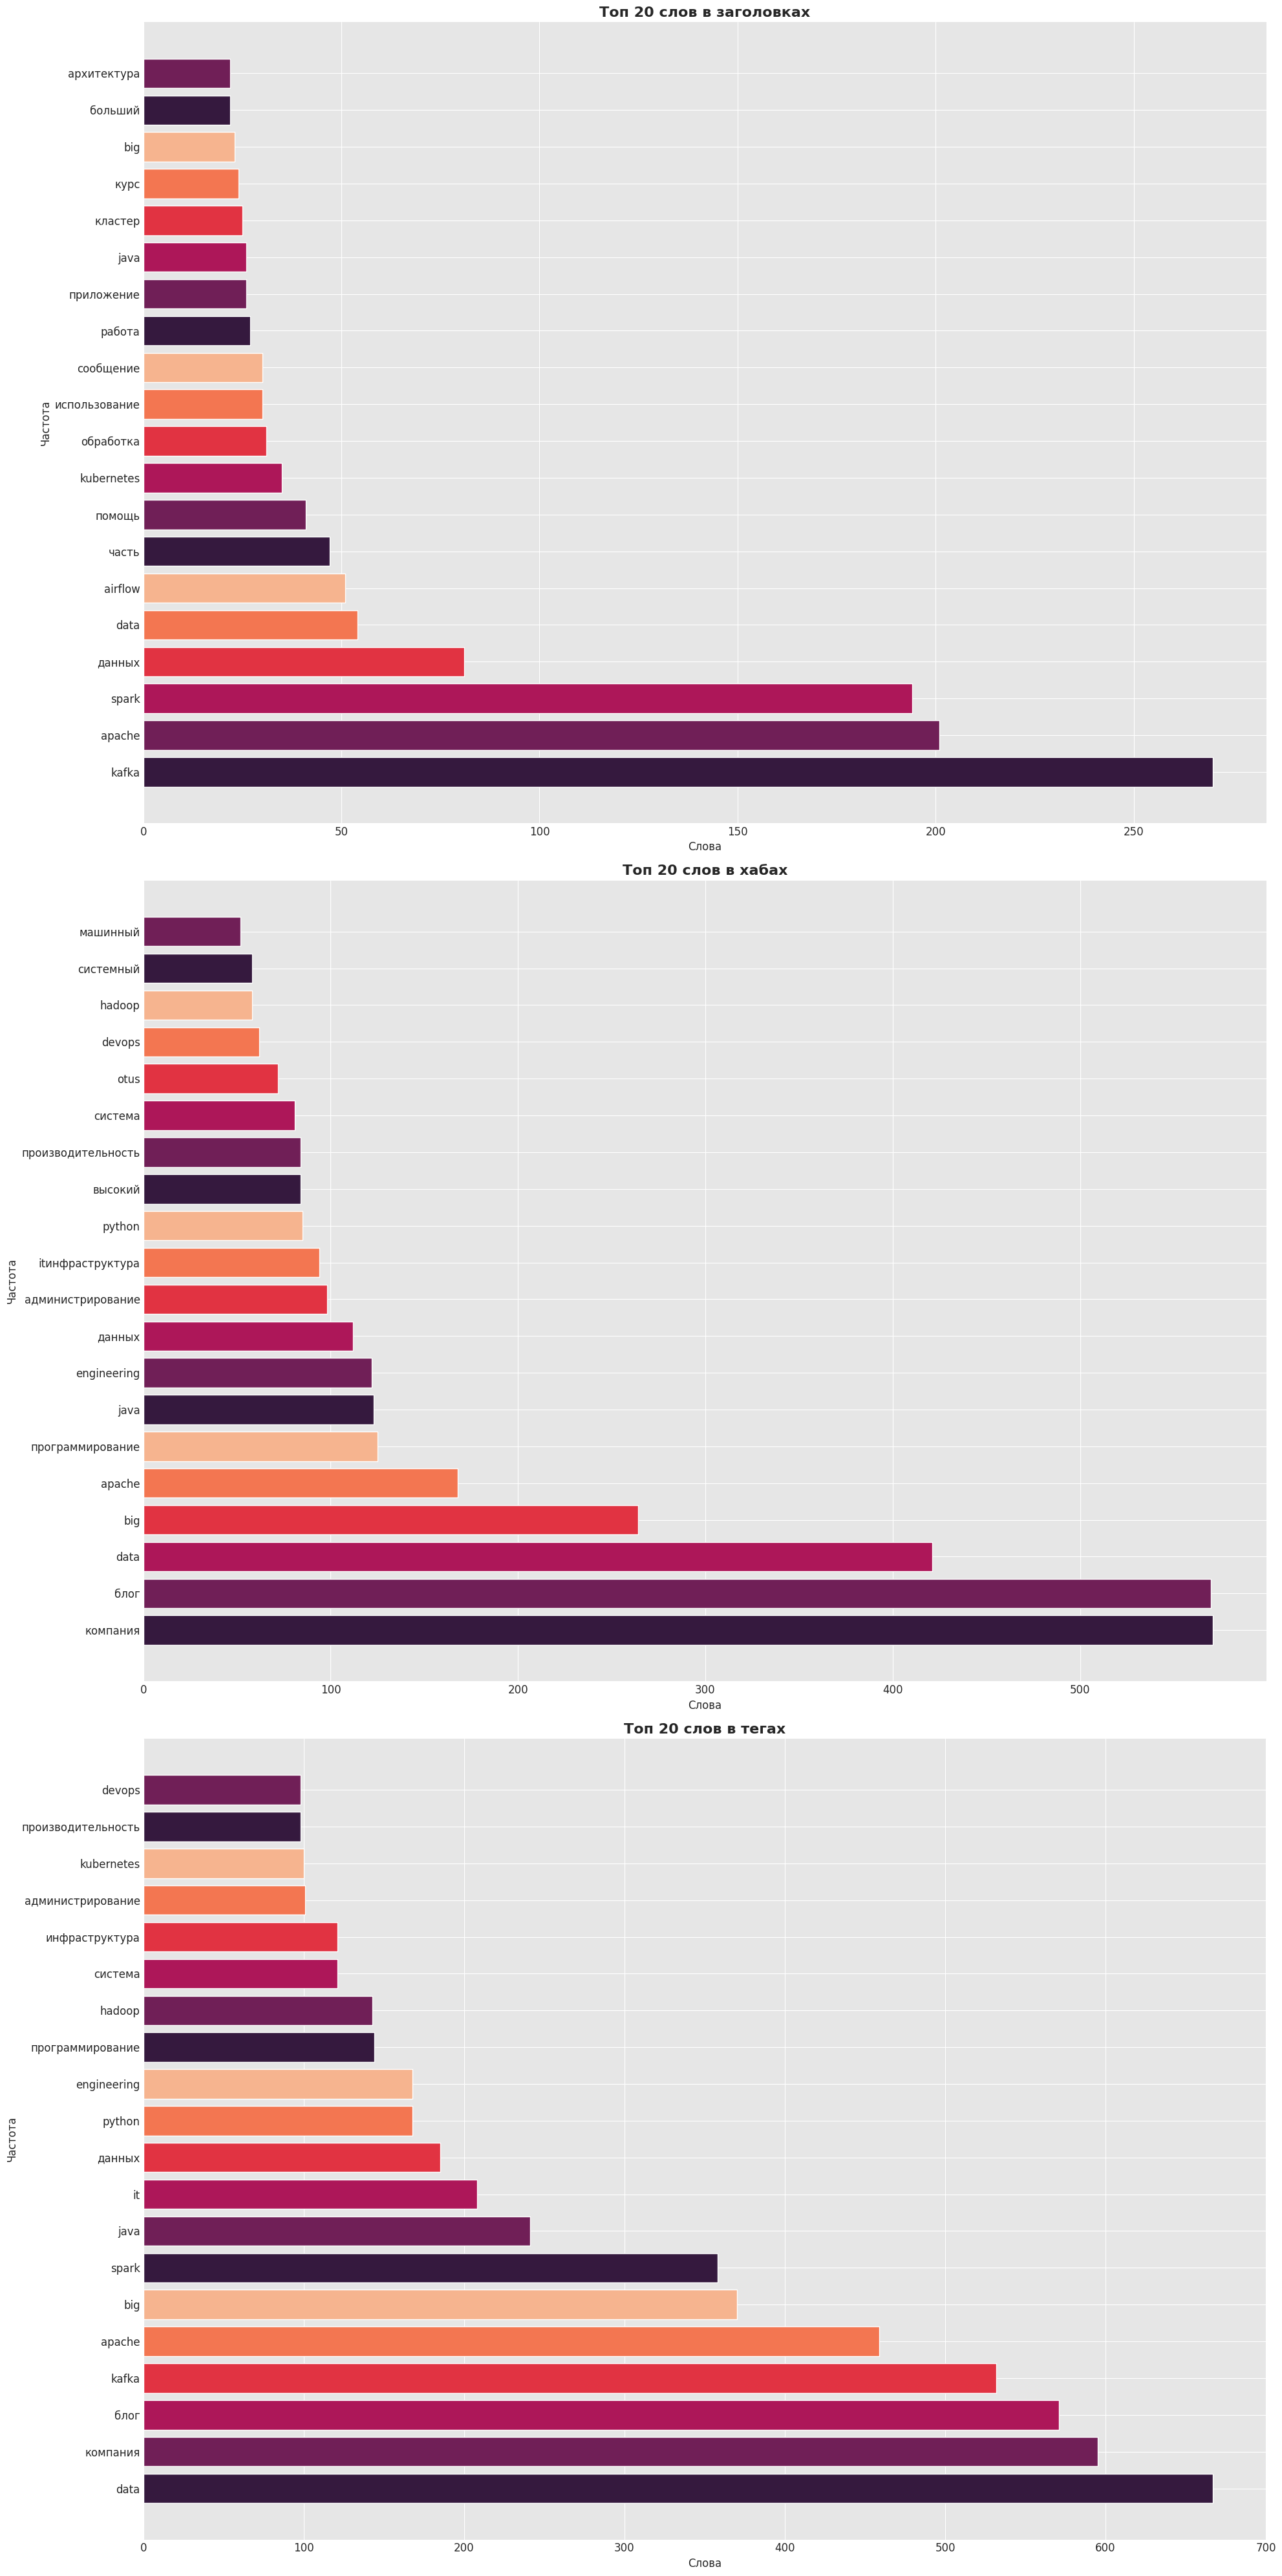

In [74]:

fig, axes = plt.subplots(3, 1, figsize=(20, 40))


titles = ["Топ 20 слов в заголовках", "Топ 20 слов в хабах", "Топ 20 слов в тегах"]

# Проходим по всем колонкам и соответствующим осям одновременно
for idx, (column, title) in enumerate(zip(['title_lemma', 'lemma_hub', 'tags_lemma'], titles)):

    tags, counts = zip(*FreqDist(habr_metadata[column].sum()).most_common(20))
    
    # Создаем график на соответствующей оси
    axes[idx].barh(tags, counts, color=sns.color_palette())
    axes[idx].set_title(title, fontsize = 16, fontweight='bold')
    axes[idx].set_xlabel("Слова", fontsize = 12)
    axes[idx].set_ylabel("Частота", fontsize = 12)

plt.tight_layout()

plt.show()

In [75]:
from matplotlib.ticker import MultipleLocator

In [79]:
# мне нужно сгруппировать по году и месяцу частоту появления слов, то есть count слов kafka spark и airlfow и большие данные и big data или в title или hub или в тегах


exploded_df = habr_metadata.explode('title_lemma') # распаковка списка 
spark_counts = exploded_df[exploded_df['title_lemma'] == 'spark'] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name ='spark_count')


kafka_counts = exploded_df[exploded_df['title_lemma'] == 'kafka'] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name='kafka_count')



airflow_counts = exploded_df[exploded_df['title_lemma'] == 'airflow'] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name='airflow_count')



big_data_counts = exploded_df[exploded_df['title_lemma'].isin(['big', 'data', 'большие'])] \
    .groupby('year')['title_lemma'] \
    .count() \
    .reset_index(name='big_data_count')




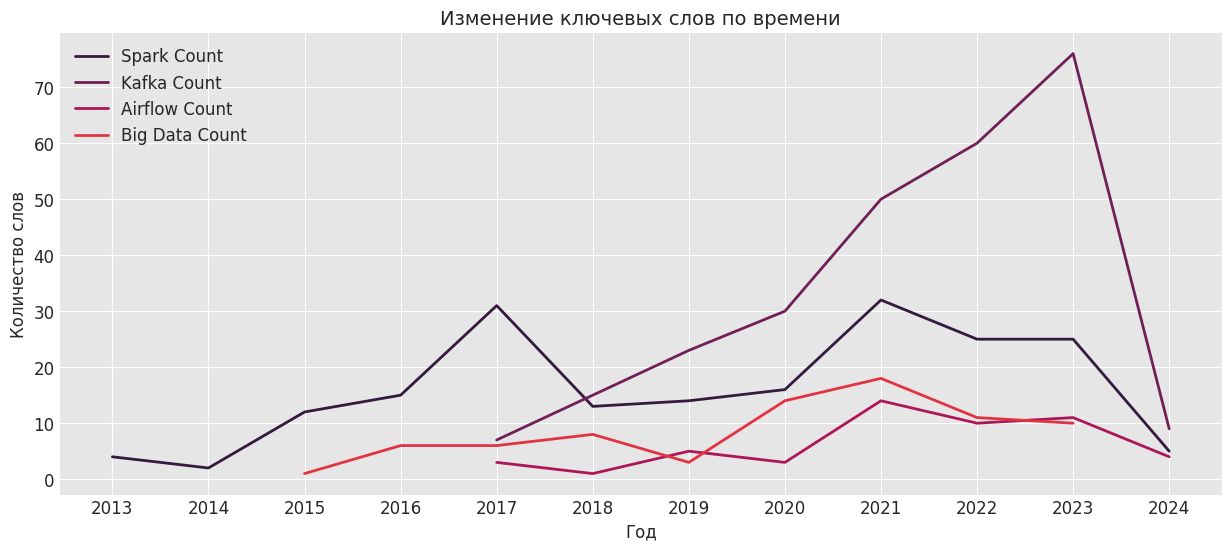

In [86]:

# Строим lineplot
plt.figure(figsize=(15, 6))  # Устанавливаем размер графика
plt.plot(spark_counts['year'], spark_counts['spark_count'],  linewidth=2, label='Spark Count')
plt.plot(kafka_counts['year'], kafka_counts['kafka_count'],linewidth=2, label='Kafka Count') 
plt.plot(airflow_counts['year'], airflow_counts['airflow_count'],  linewidth=2, label='Airflow Count') 
plt.plot(big_data_counts['year'], big_data_counts['big_data_count'],  linewidth=2, label='Big Data Count') 

ax = plt.gca()  # Получаем текущие оси
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("Год")
plt.ylabel("Количество слов")
plt.title("Изменение ключевых слов по времени")
plt.grid(True) # Добавляем сетку для лучшей читаемости
plt.legend()
plt.show()

## Теперь посмотрим динамику популярности статей

In [88]:

habr_metadata['year'] = habr_metadata.time.dt.year
habr_metadata['month'] = habr_metadata.time.dt.month
habr_metadata['day'] = habr_metadata.time.dt.day

# группировка данных по количеству просмотров, комментариев и сохранений
sum_by_metadata = habr_metadata \
    .groupby(['year']) \
    .agg(sum_of_views = ('views', 'sum'),
         sum_of_bookmarks = ('bookmarks', 'sum'),
         sum_of_comments = ('comments', 'sum')) \
    .reset_index() 



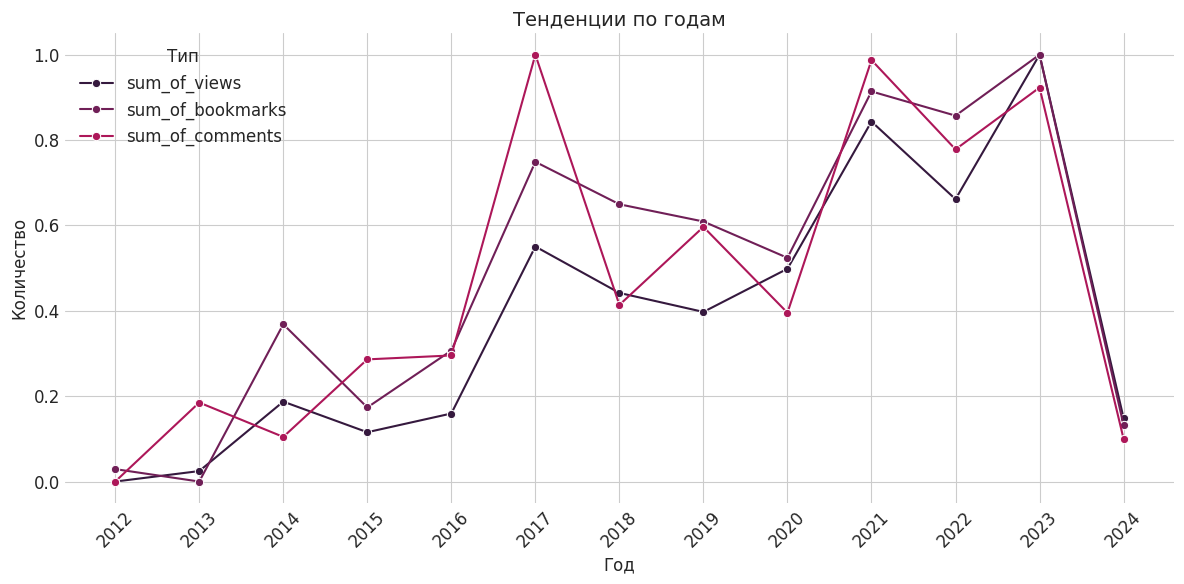

In [94]:
# нормализация данных к диапазону от 0 до 1 

for col in ['sum_of_views', 'sum_of_bookmarks', 'sum_of_comments']:
    sum_by_metadata[col] = (sum_by_metadata[col] - sum_by_metadata[col].min()) / (sum_by_metadata[col].max() - sum_by_metadata[col].min())

# Преобразование DataFrame для удобства работы с Seaborn
sum_by_metadata_melted = sum_by_metadata.melt('year', var_name='Type', value_name='Count')


plt.figure(figsize=(12, 6))



sns.lineplot(x='year', y='Count', hue='Type', data=sum_by_metadata_melted, marker='o')

ax = plt.gca()  # Получаем текущие оси
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.title('Тенденции по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='Тип')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Работа с времянными рядами

In [119]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind

In [197]:
# групировка по годам и месяцу
yearly_stats = habr_metadata.groupby(pd.Grouper(key='time', freq='ME')).agg(
    total_views=('views', 'sum'),          
    total_observations=('views', 'count'),
    total_bookmarks = ('bookmarks','sum' ),
    total_comments = ('comments', 'sum')
).reset_index()

# создадим колонки с относительными наблюдениями 

yearly_stats['avg_views_per_observation'] = (
    yearly_stats['total_views'] / yearly_stats['total_observations']
)

yearly_stats['avg_bookmarks_per_observation'] = (
    yearly_stats['total_bookmarks'] / yearly_stats['total_observations']
)

yearly_stats['avg_comments_per_observation'] = (
    yearly_stats['total_comments'] / yearly_stats['total_observations']
) 
yearly_stats

,time,total_views,total_observations,total_bookmarks,total_comments,avg_views_per_observation,avg_bookmarks_per_observation,avg_comments_per_observation
0,2012-01-31 00:00:00+00:00,68000,1,285,15,68000.000000,285.000000,15.000000
1,2012-02-29 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN
2,2012-03-31 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN
3,2012-04-30 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN
4,2012-05-31 00:00:00+00:00,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
142,2023-11-30 00:00:00+00:00,552000,14,516,51,39428.571429,36.857143,3.642857
143,2023-12-31 00:00:00+00:00,236000,4,155,6,59000.000000,38.750000,1.500000
144,2024-01-31 00:00:00+00:00,467945,11,417,61,42540.454545,37.909091,5.545455
145,2024-02-29 00:00:00+00:00,477000,9,533,41,53000.000000,59.222222,4.555556


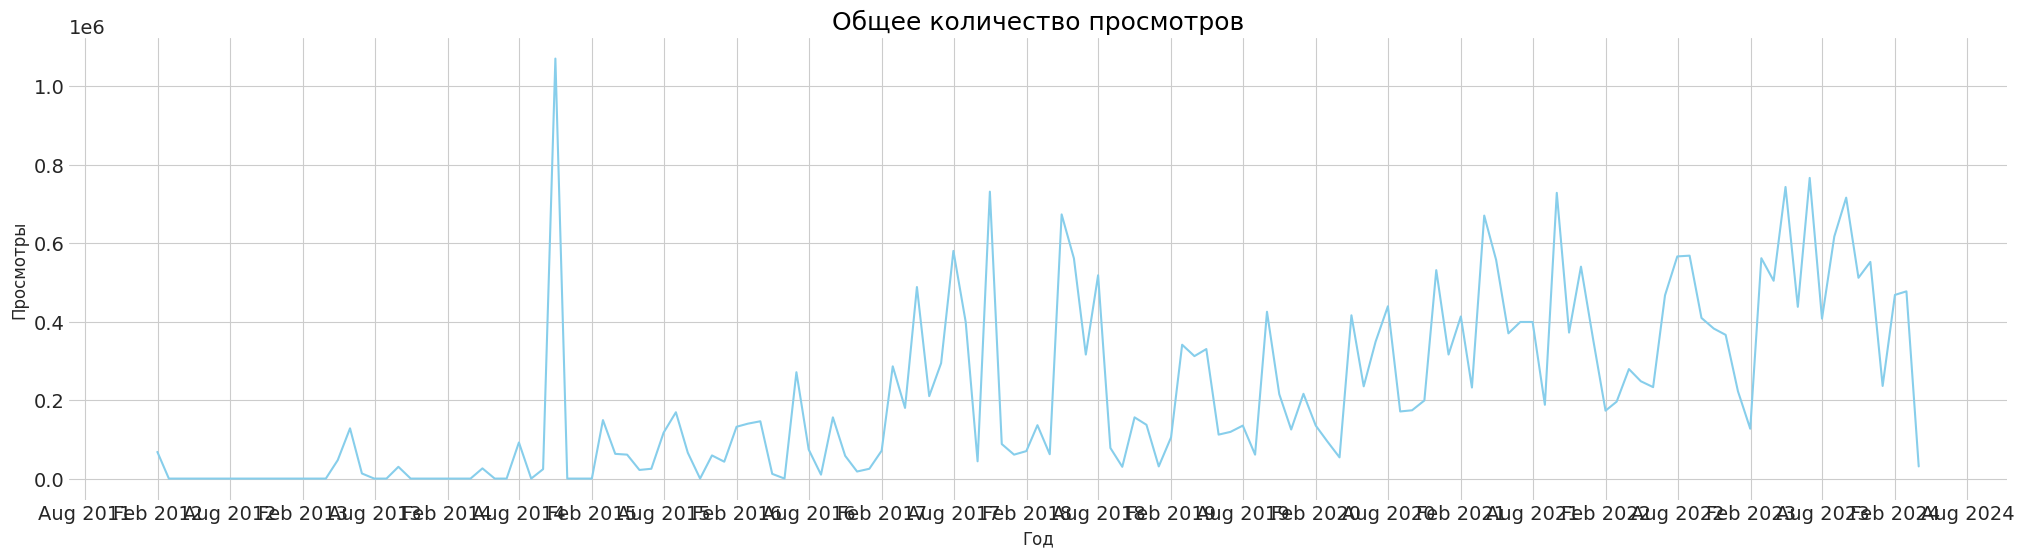

In [198]:
# Визуализация
fig, ax = plt.subplots(figsize=(25, 6))
plt.title("Общее количество просмотров", fontsize=18, color = 'black')
rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14
plt.xlabel("Год")
plt.ylabel("Просмотры")

# График общего количества просмотров

plt.plot(yearly_stats['time'], yearly_stats['total_views'], color='skyblue')

# Используем YearLocator для размещения тиков по годам:
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# Форматируем тики как год (четыре цифры):
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


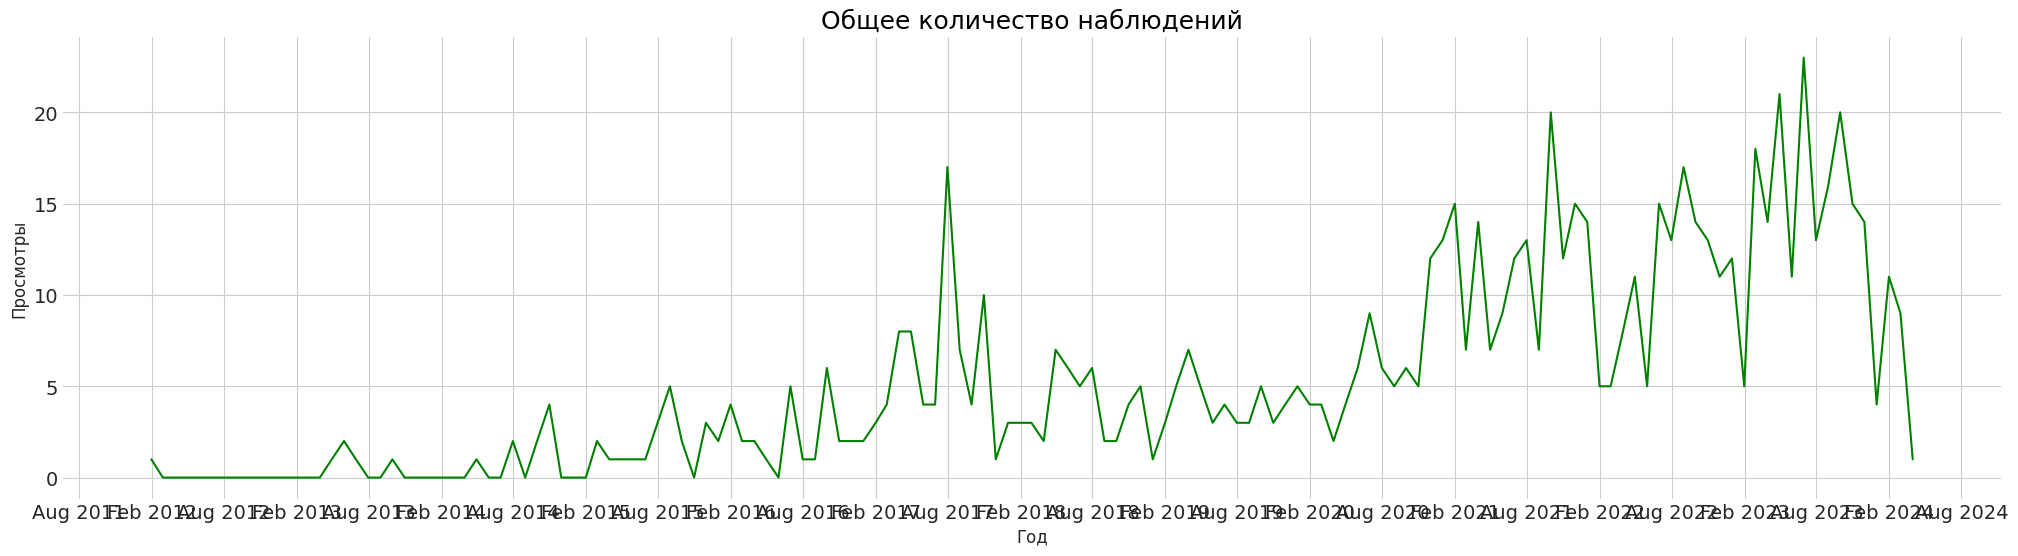

In [199]:
fig, ax = plt.subplots(figsize=(25, 6))
plt.title("Общее количество наблюдений", fontsize=18, color = 'black')
rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14
plt.xlabel("Год")
plt.ylabel("Просмотры")

# График общего количества просмотров

plt.plot(yearly_stats['time'], yearly_stats['total_observations'], color='green')

# Используем YearLocator для размещения тиков по годам:
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# Форматируем тики как год (четыре цифры):
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

### Теперь возьмем срезы по годам 

In [261]:

columns_to_fill = [
    'avg_views_per_observation',
    'avg_bookmarks_per_observation',
    'avg_comments_per_observation'
]

for column in columns_to_fill:
    yearly_stats[column] = yearly_stats.groupby(pd.Grouper(key='time', freq='YE'))[column].transform(lambda x: x.fillna(x.mean()))

filtered_2017 = yearly_stats[yearly_stats['time'].dt.year.isin([2017,2018])]
filtered_2022 = yearly_stats[yearly_stats['time'].dt.year.isin([2022,2023])]
other_periods = yearly_stats[~yearly_stats['time'].dt.year.isin([2017, 2018, 2022, 2023])]



yearly_stats['period'] = np.nan

# Применение условий для заполнения колонки
yearly_stats.loc[yearly_stats['time'].dt.year.isin([2017,2018]), 'period'] = 'period_2017'
yearly_stats.loc[yearly_stats['time'].dt.year.isin([2022, 2023]), 'period'] = 'period_2022'

yearly_stats['period'] = yearly_stats['period'].fillna('other_period')


/tmp/ipykernel_279075/4048380498.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'period_2017' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  yearly_stats.loc[yearly_stats['time'].dt.year.isin([2017,2018]), 'period'] = 'period_2017'


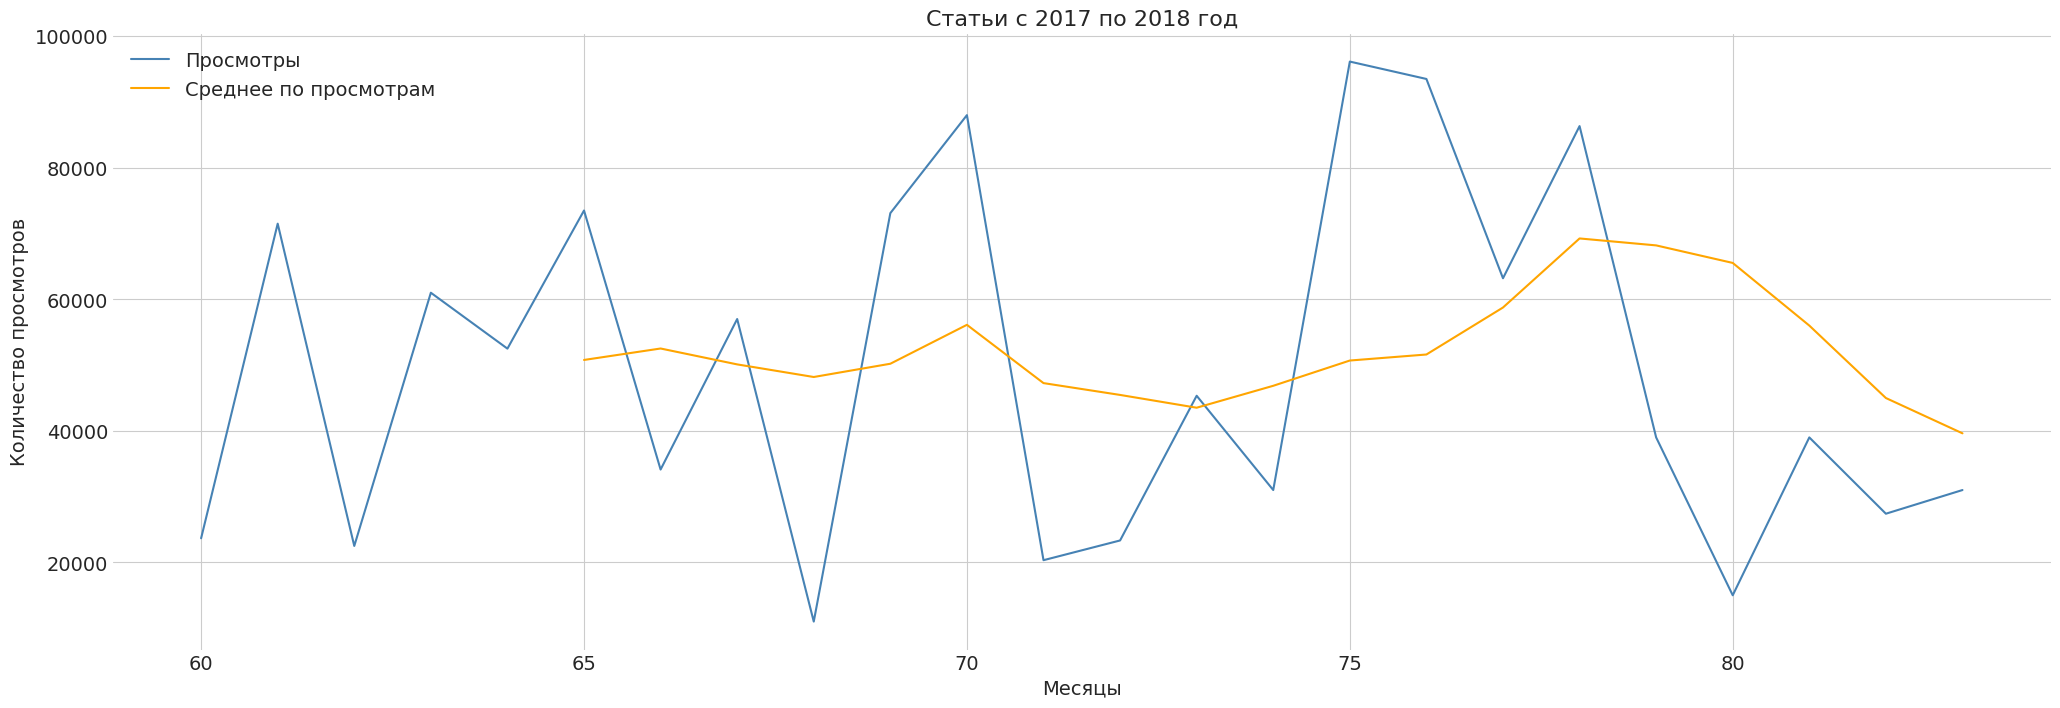

In [ ]:



# зададим размер графика
plt.figure(figsize = (25,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(filtered_2017['avg_views_per_observation'], label = 'Просмотры', color = 'steelblue')
plt.plot(filtered_2017['avg_views_per_observation'].rolling(window = 6).mean(), label = 'Среднее по просмотрам', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество просмотров', fontsize = 14)
plt.title('Статьи с 2017 по 2018 год', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

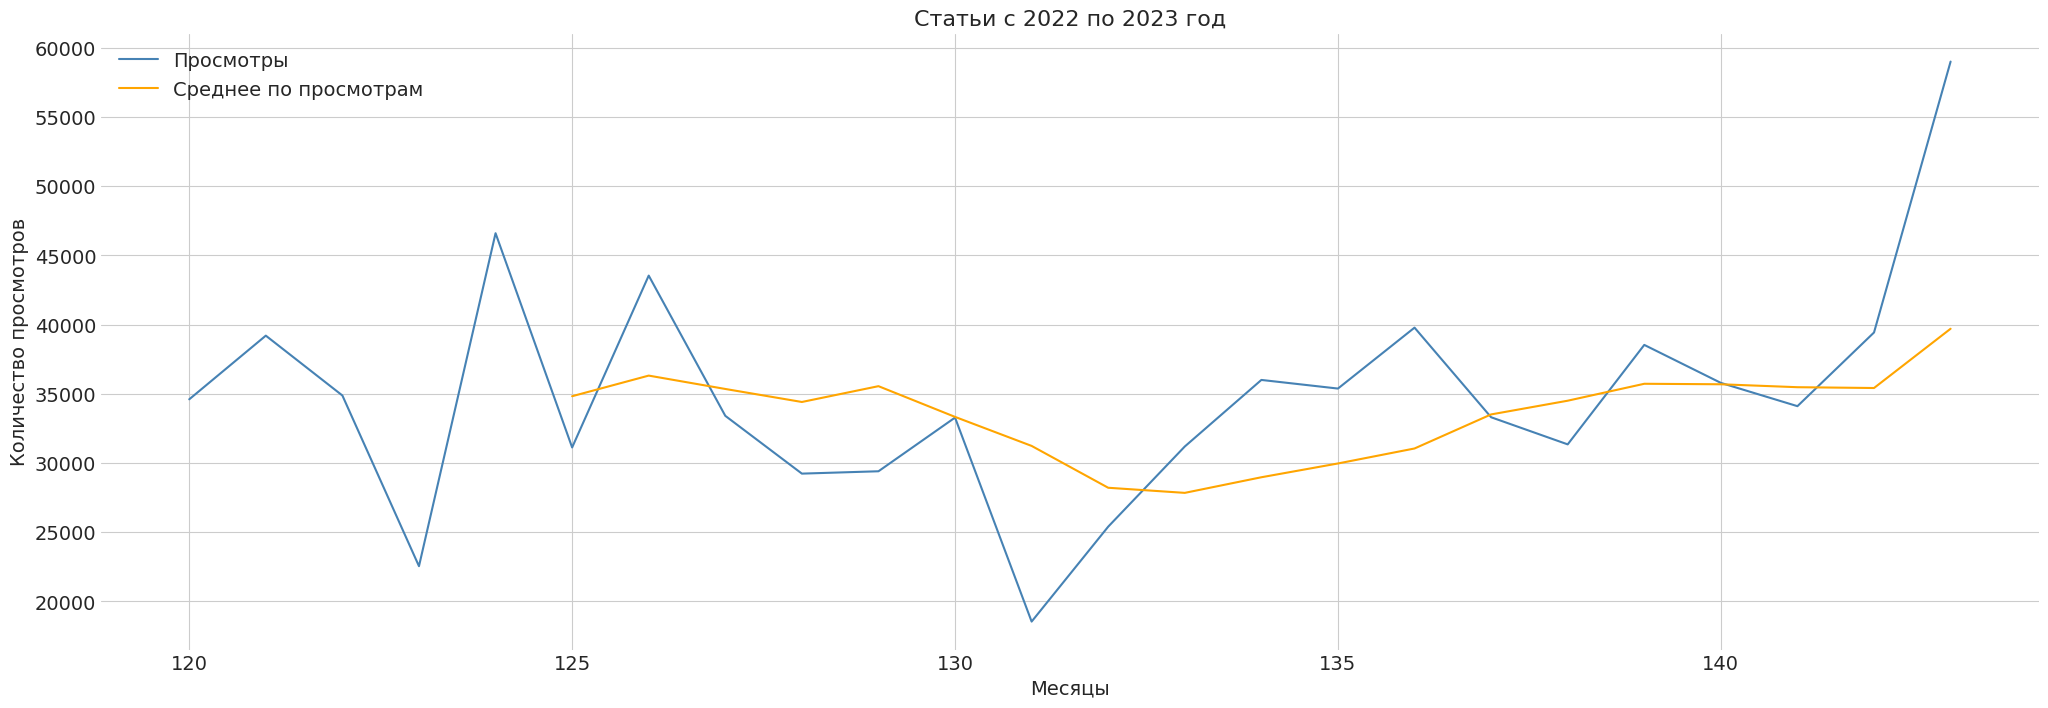

In [208]:
# зададим размер графика
plt.figure(figsize = (25,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(filtered_2022['avg_views_per_observation'], label = 'Просмотры', color = 'steelblue')
plt.plot(filtered_2022['avg_views_per_observation'].rolling(window = 6).mean(), label = 'Среднее по просмотрам', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество просмотров', fontsize = 14)
plt.title('Статьи с 2022 по 2023 год', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

Проверим ряд на стационарность через тест Дики Фуллера.  Тест имеет нулевую гипотезу, что данные имеют единичный корень, что означает, что они не стационарны. Альтернативная гипотеза заключается в том, что данные стационарны или тренд-стационарны.

In [211]:
# импортируем необходимую функцию
from statsmodels.tsa.stattools import adfuller

# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(filtered_2017['avg_views_per_observation'],  autolag='AIC')

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.05760445780703663


In [212]:
# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(filtered_2022['avg_views_per_observation'],  autolag='AIC')

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.02968638530646369


Ряд стационарен 

In [222]:
from scipy.stats import mannwhitneyu

In [250]:

# Проведение теста Манна—Уитни
u_statistic, p_value = mannwhitneyu(filtered_2017['avg_views_per_observation'], other_periods['avg_views_per_observation'], alternative='two-sided')

print(f'U-статистика: {u_statistic}')
print(f'p-значение: {p_value}')

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие между группами.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.")

U-статистика: 1190.0
p-значение: 0.9923561160146765
Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.


In [256]:
# Проведение теста Манна—Уитни
u_statistic, p_value = mannwhitneyu(filtered_2022['avg_views_per_observation'], other_periods['avg_views_per_observation'], alternative='two-sided')

print(f'U-статистика: {u_statistic}')
print(f'p-значение: {p_value}')

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие между группами.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимого различия между группами не обнаружено.")

U-статистика: 831.5
p-значение: 0.022985155204749863
Отвергаем нулевую гипотезу: существует статистически значимое различие между группами.


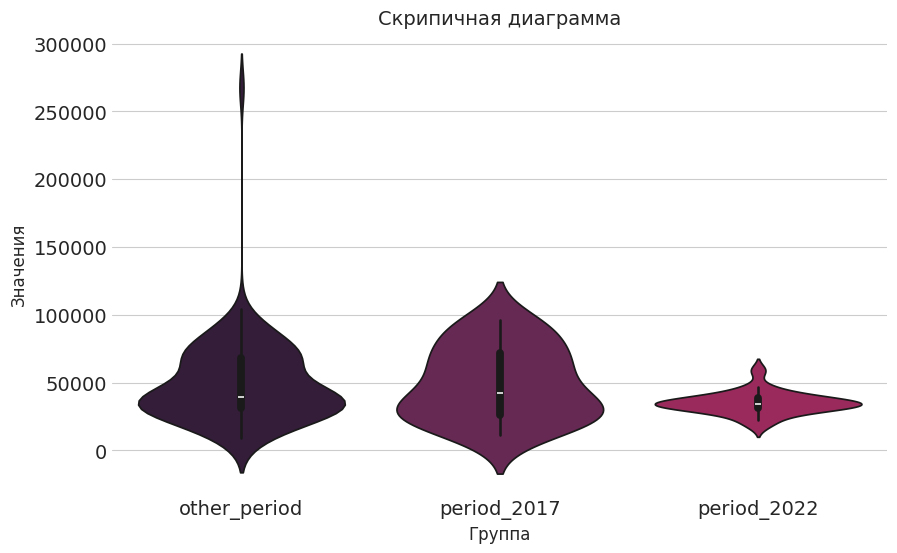

In [264]:

# Boxplot для проверки равенства дисперсий
plt.figure(figsize=(10, 6))
sns.violinplot(x='period', y='avg_views_per_observation', data=yearly_stats, hue='period')
plt.title("Скрипичная диаграмма")
plt.xlabel("Группа")
plt.ylabel("Значения")
plt.show()

# Работа с топик моделированием 

In [265]:
import gensim


# Чтение CSV-файла с преобразованием строк в списки
# habr_metadata = pd.read_csv('habr_metadata.csv', converters={'title_lemma': ast.literal_eval, 'tags_lemma': ast.literal_eval, 'lemma_hub': ast.literal_eval})

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [105]:
list_of_title = habr_metadata['title_lemma'].to_list()


In [102]:
gensim_dictionary = gensim.corpora.Dictionary(list_of_title)
gensim_dictionary.filter_extremes(no_above=0.15, no_below=15)
gensim_dictionary.compactify()

NameError: name 'gensim' is not defined

In [38]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in list_of_title]

In [45]:
lda_10 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=6, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [40]:
lda_10.print_topics()

[(0,
  '0.316*"airflow" + 0.189*"сообщение" + 0.138*"архитектура" + 0.100*"обзор" + 0.084*"streaming" + 0.064*"etl" + 0.052*"работа" + 0.026*"данных" + 0.002*"помощь" + 0.002*"использование"'),
 (1,
  '0.260*"данных" + 0.209*"часть" + 0.139*"обработка" + 0.085*"система" + 0.067*"помощь" + 0.066*"база" + 0.063*"rabbitmq" + 0.032*"sql" + 0.028*"etl" + 0.028*"streaming"'),
 (2,
  '0.281*"data" + 0.161*"использование" + 0.125*"big" + 0.118*"больший" + 0.109*"spring" + 0.097*"данных" + 0.075*"streams" + 0.004*"приложение" + 0.003*"python" + 0.003*"java"'),
 (3,
  '0.180*"помощь" + 0.179*"java" + 0.177*"приложение" + 0.172*"кластер" + 0.111*"разработчик" + 0.070*"sql" + 0.036*"rabbitmq" + 0.024*"streams" + 0.010*"данных" + 0.005*"часть"'),
 (4,
  '0.284*"kubernetes" + 0.199*"курс" + 0.156*"работа" + 0.140*"инструмент" + 0.138*"python" + 0.019*"data" + 0.011*"airflow" + 0.011*"разработчик" + 0.005*"данных" + 0.004*"использование"')]

In [41]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_10,
                                     texts = list_of_title,
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
 
print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.48262825154330374


In [43]:
def coherence_score(dictionary, corpus, texts, max, start=2, step=3,
                    measure="c_uci"):
    """
    Функция вычисляет метрики для оценки тем. моделирования и выводит 
    график, где по оси x отложено количество топиков, а по оси y — значение 
    метрики
    :param dictionary: словарь для тематического моделирования
    :param corpus: корпус в виде мешка слов
    :param texts: тексты документов
    :param max: максимальное количество топиков
    :param start: стартовое количество топиков
    :param step: промежуток, с которым вычисляются топики
    :param measure: метрика
    """
    coherence_values = []
    for num_topics in range(start, max, step):
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, 
                                           passes=10, num_topics=num_topics, 
                                           random_state=6457)
        coherencemodel = CoherenceModel(model=model, texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=measure)
        coherence_values.append(coherencemodel.get_coherence())
    x = range(start, max, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel(measure + "score")
    plt.legend(("coherence_score"), loc='best')
    plt.show() 

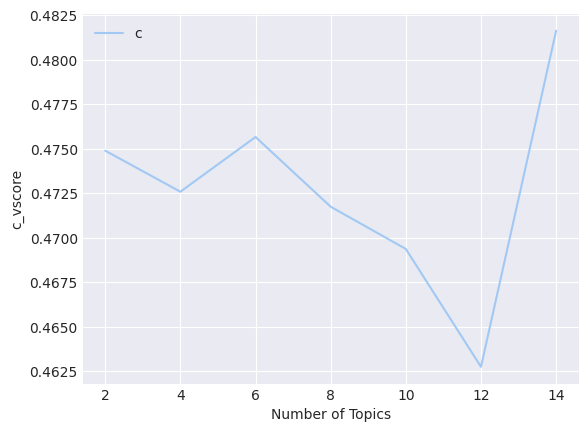

In [44]:
coherence_score(dictionary=gensim_dictionary, corpus=corpus, texts=list_of_title, start=2, max=15, step=2, measure="c_v")

/tmp/ipykernel_1198/246756939.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_1198/246756939.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_1198/246756939.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_1198/246756939.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'],

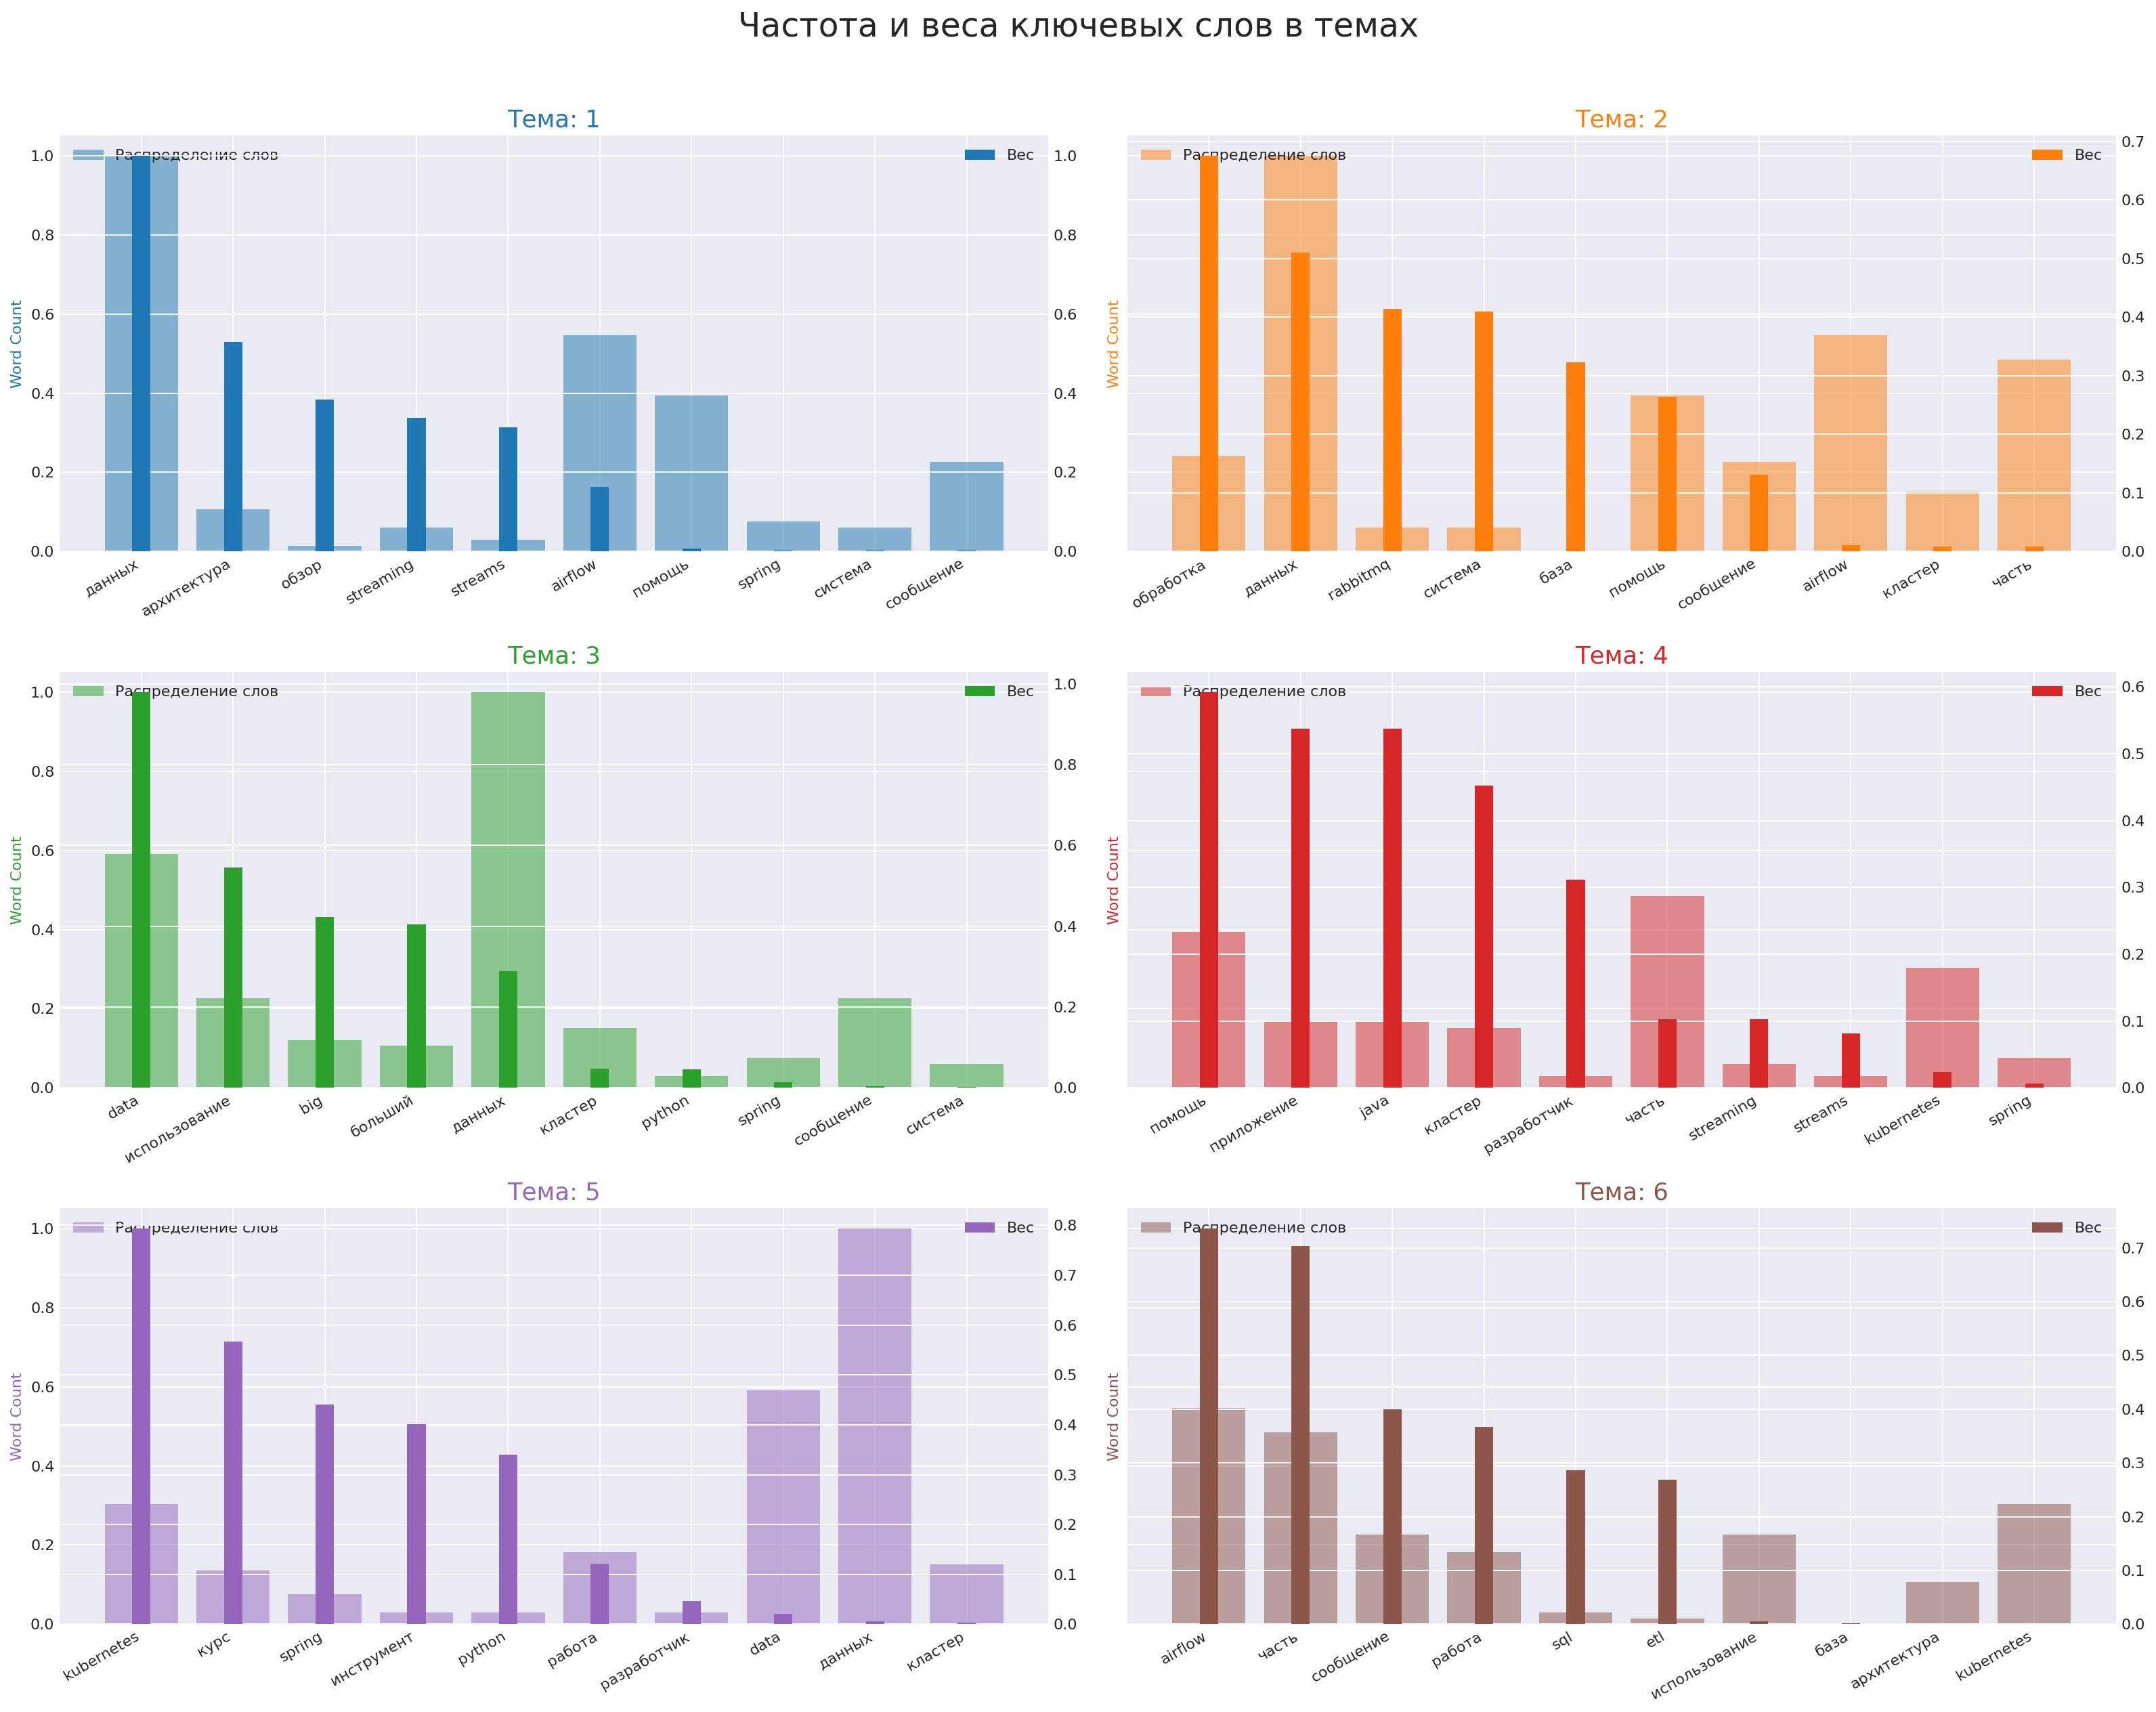

In [46]:
from collections import Counter
import matplotlib.colors as mcolors
topics = lda_10.show_topics(formatted=False)
data_flat = [w for w_list in list_of_title for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

for col in ['word_count', 'importance']:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(20,15), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.8, alpha=0.5, label='Распределение слов')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Вес')
    ax.set_ylabel('Word Count', color=cols[i])
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Тема: ' + str(i+1), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Частота и веса ключевых слов в темах', fontsize=22, y=1.05)
plt.show()

In [7]:
habr_metadata.to_csv('habr_metadata.csv')
sum_by_metadata_melted.to_csv('sum_by_metadata_melted.csv')

NameError: name 'habr_metadata' is not defined